# Build Vgg16 model from scratch


# Data preparation

In [1]:
#Verify we are in the project directory
%pwd

u'/home/ubuntu/nbs'

In [2]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/'

In [3]:
# Create directories
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/nbs/data


In [4]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/nbs/data/train


### Prepare the train and validation data

In [7]:
from glob import glob
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

In [8]:
from shutil import copyfile
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

### Prepare sample data for quick experiements

In [9]:
%cd $DATA_HOME_DIR/valid

/home/ubuntu/nbs/data/valid


In [10]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/' + shuf[i])

### Distribute data to appropreate folders

In [11]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/nbs/data/sample/train
/home/ubuntu/nbs/data/sample/valid
/home/ubuntu/nbs/data/valid
/home/ubuntu/nbs/data/train


# Model Preparation

In [6]:
# Load packages
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
import numpy as np
import json, os

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image


Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


## Preprocessing
Vgg is trained using imageNet images. The authors substracted average channel values so that their input data has zero mean for each channel. In addtion, their channel order is B,G,R, whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes.

In [12]:
# Channel B,G, R means
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # change order to BGR 

vgg_mean

array([[[ 123.68 ]],

       [[ 116.779]],

       [[ 103.939]]])

# Building Vgg16 model

In [13]:
# Define vgg16 model as a Python object

def Vgg16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224))) # Theano shape
    
    ###### Convolution Block 1  #########
    # Convolution layer 1
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64,3, 3, activation='relu' )) 
    # Convilution layer 2
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64,3, 3, activation='relu' ))
    # Maxpool 1
    model.add(MaxPooling2D((2,2), strides=(2,2)))
   
    ###### Convolution Block 2  #########
    # Convolution layer 3
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,3, 3, activation='relu' )) 
    # Convilution layer 4
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,3, 3, activation='relu' ))
    # Maxpool 2
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    ###### Convolution Block 3  #########
    # Convolution layer 5
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,3, 3, activation='relu' )) 
    # Convilution layer 6
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,3, 3, activation='relu' ))
    # Convilution layer 7
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,3, 3, activation='relu' ))
    # Maxpool 3
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    ###### Convolution Block 4  #########
    # Convolution layer 5
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' )) 
    # Convilution layer 6
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' ))
    # Convilution layer 7
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' ))
    # Maxpool 3
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    ###### Convolution Block 5  #########
    # Convolution layer 5
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' )) 
    # Convilution layer 6
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' ))
    # Convilution layer 7
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,3, 3, activation='relu' ))
    # Maxpool 3
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense 1
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    # Dense 2
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1000, activation='softmax'))
    return model
model =Vgg16()
model.summary() 

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

Now, let's download the pretrained weights that vgg16 creators has trained from iamgeNet

In [14]:
# ulr to download pretrained weights
FILES_PATH = 'http://www.platform.ai/models/';
# using Keras get_file method to download and cache the weights
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
# load the weights to our previous built vgg16 model
model.load_weights(fpath)

552861696/553482496 [============================>.] - ETA: 0s

# Adapt pretrained model to our classification problem

What we did previously allows us to have a model that was trained on a very large number of ImageNet images to classify 1000 object categeries. During that training process, the model has learned many important features of the world such as shapes (rounds, squares, angles, etc), colors, faces, etc. Thus, we have a very general purpose model that may contain many features that we want to learn for our particular problems at hand. 

*** The important idea is if we are classifying objects that are not EVEN in the 1000 ImageNet categories, there are still learned features in the pretrained model that are relevant and useful to our problem **

Now, come back to our specific problem - classify dogs and cats, we know that imageNet database contains a lot of dog and cat pictures. Therefore, the pretrained model (weights) may already contained important features to distinguish dogs and cats. We will leverage the pretrained model's power and also adapt to our specific tasks- classify two categories instead of 1000 categories.

So, our plan is:

1. Take the pretrained model and set all the layers except the last layer to be "untrainable", i.e., we will not train them. 

2. Stick a dense layer with softmax activation which outputs 2 categories at the end.

2. Pass our data into the model to train the last dense layer.

**** Why we remove the last layer? because it has a softmax activation and stick another dense layer with another softmax activation is unusual (odd) since softmax outputs probabilities, it often activates the last layer not interminate layers.

In [15]:
# Set all the layers to untrainale.
model.pop()
for layer in model.layers: layer.trainable = False

Add a dense layer on top of vgg16 model

In [16]:
model.add(Dense(2, activation = 'softmax'))

In [17]:
# Let's see the outcome model
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

Okie, we've got what we wanted.

# Training preparation

We have two options to train the pretrained model:

*** Option 1:*** Build a completely separate dense model.
1. Generate predictions from pretrained model as input to our new (dense) model. 
2. Use this input to train our new model.

*** Option 2: *** Build a new model with the part taken from vgg16 model and add our new dense model on top of it.

1. Feed data to entire big model.
2. Only back-prop (train) the layers we want to train.


The option 1 has a big advantage on computational time because we essentially pre-calculate the input for the dense layers and train the dense layers is fast. But coding option 1 is a little bit more complicated. Option 2 takes a bit longer time to train but coding is pretty straightforward. As the result, I go for option 2.
### Batches preparation

In [63]:
# Prepare path to data
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/'
test_path = DATA_HOME_DIR + 'Test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/home/ubuntu/nbs/data


In [19]:
batch_size =50

In [20]:
# helper function to get batches
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [22]:
# Prepare batches for training and validation

# Using helper
gen = image.ImageDataGenerator()
batches = get_batches(train_path, gen, batch_size=batch_size)
val_batches = get_batches(valid_path, gen, batch_size=batch_size)



#
#batches = gen.flow_from_directory(train_path, shuffle = True, target_size=(224,224), batch_size = batch_size)
#val_batches = gen.flow_from_directory(valid_path, shuffle = True, target_size=(224,224), batch_size = batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Complie and train model

In [23]:
# Compile, seting hyperparameters : optimization method, learning rate, loss, validation metric
opt = RMSprop(lr =0.1)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# Train

# Define a helper function to call multiple times
def fit_model(model, batches, val_batches, nb_epoch =1):
    model.fit_generator(batches, samples_per_epoch = batch_size, nb_epoch =nb_epoch,
                       validation_data = val_batches,nb_val_samples = batch_size)


In [28]:
# Fit
fit_model(model,batches,val_batches,nb_epoch=2)

Epoch 1/2
50/50 [==============================] - 3s - loss: 0.0628 - acc: 0.9800 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 2/2
50/50 [==============================] - 3s - loss: 0.7040 - acc: 0.9400 - val_loss: 0.6447 - val_acc: 0.9600


Let's save our trained model for evaluation

In [29]:
%pwd()

u'/home/ubuntu/nbs/data'

In [30]:
# Back to project dir
%cd $current_dir
# Create a directory to save model
%mkdir Models

model_path = current_dir + '/Models/'

/home/ubuntu/nbs


In [31]:
# Save model
model.save_weights(model_path + 'model_tune_1.h5')

## Evaludate model

In [32]:
# helper function to get data
def get_data(path, target_size=(224,224)):
    batches = get_batches(path, shuffle=False, batch_size=1, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.nb_sample)])

# Onehot encoder
from sklearn.preprocessing import OneHotEncoder
def onehot(x):
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [33]:
# Get validation data
val_data = get_data(valid_path)
# Get validation labels
val_classes =val_batches.classes
val_labels = onehot(val_classes)

Found 2000 images belonging to 2 classes.


In [34]:
# reporting loss and accuracy
model.evaluate(val_data,val_labels)

2000/2000 [==============================] - 52s    


[0.52986436943803461, 0.96650000000000003]

In [35]:
# Prediction
preds = model.predict_classes(val_data, batch_size =batch_size)

2000/2000 [==============================] - 52s    


Confusion matrix is a good tool to see performance of binary classification

In [37]:
from sklearn.metrics import confusion_matrix
cfmatrix = confusion_matrix(val_classes, preds)

[[1001   38]
 [  29  932]]


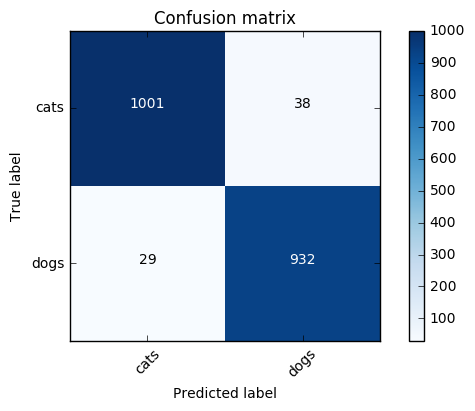

In [38]:
# Helper function to plot confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cfmatrix, val_batches.class_indices)


Not so good. We can, instead of training only the last layer, train all the dense layers. Why shouldn't we touch the convolutional layers? Because, in my opinion, convolutional layers store most of the information that the model learned from ImageNet database such as shapes, orientations, faces,etc. By touching these layers, we may very well detroy valuable features.

# Train all the dense layers in Vgg16 model

Our plan is to train all the dense layers. We can still train the convolutional layers if we want and we can even design our all model

In [39]:
layers = model.layers
# Get the first layers
first_layer = [index for index, layer in enumerate(layers) if type(layer) is Dense][0]
# Set all the layers from the first dense layers to be trainable
for layer in layers[first_layer:]: layer.trainable = True

Okie, all the dense layers are now trainable. Note that we didn't modify the architechure of the model at all, we just allow it to train new layers so we do not need to recompile it.

In [40]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

we now have nearly 15 millions parameters, training will take much longer. 

In [41]:
K.set_value(opt.lr,0.01)
fit_model(model, batches,val_batches, 10)

Epoch 1/10
50/50 [==============================] - 3s - loss: 0.8181 - acc: 0.9400 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 2/10
50/50 [==============================] - 3s - loss: 0.6447 - acc: 0.9600 - val_loss: 0.6064 - val_acc: 0.9600
Epoch 3/10
50/50 [==============================] - 3s - loss: 0.6447 - acc: 0.9600 - val_loss: 0.9671 - val_acc: 0.9400
Epoch 4/10
50/50 [==============================] - 3s - loss: 0.3224 - acc: 0.9800 - val_loss: 0.3224 - val_acc: 0.9800
Epoch 5/10
50/50 [==============================] - 3s - loss: 0.9671 - acc: 0.9400 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 6/10
50/50 [==============================] - 3s - loss: 0.3224 - acc: 0.9800 - val_loss: 0.3224 - val_acc: 0.9800
Epoch 7/10
50/50 [==============================] - 3s - loss: 0.2133 - acc: 0.9800 - val_loss: 0.0787 - val_acc: 0.9800
Epoch 8/10
50/50 [==============================] - 3s - loss: 0.3224 - acc: 0.9800 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9/10
50/50 [==========

## Evaluation


2000/2000 [==============================] - 53s    
[[1007   32]
 [  34  927]]


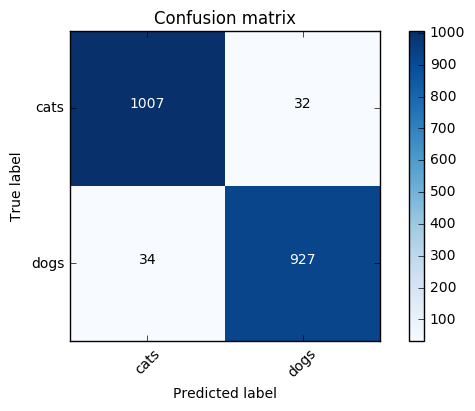

In [42]:
# reporting loss and accuracy
model.evaluate(val_data,val_labels)
# Prediction
preds = model.predict_classes(val_data, batch_size =batch_size)

# Confusion matrix
cfmatrix = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cfmatrix, val_batches.class_indices)

## Generate result for test set

In [64]:
test_path

'/home/ubuntu/nbs/data/Test/'

In [69]:
# Helper function to test the test data

test_batches = get_batches(test_path, shuffle=False, batch_size=batch_size, class_mode=None)
preds = model.predict_generator(test_batches, test_batches.nb_sample)

Found 12500 images belonging to 1 classes.


In [67]:
filenames = test_batches.filenames
filenames[:5]

['test/9292.jpg',
 'test/12026.jpg',
 'test/9688.jpg',
 'test/4392.jpg',
 'test/779.jpg']

### Save predictions

In [71]:
#Save our test results arrays so we can use them again later
import bcolz
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

### Load predictions

In [73]:
#Load our test predictions from file
def load_array(fname):
    return bcolz.open(fname)[:]
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [75]:
filenames = test_batches.filenames

In [77]:
filenames

['test/9292.jpg',
 'test/12026.jpg',
 'test/9688.jpg',
 'test/4392.jpg',
 'test/779.jpg',
 'test/2768.jpg',
 'test/2399.jpg',
 'test/12225.jpg',
 'test/10947.jpg',
 'test/1780.jpg',
 'test/11631.jpg',
 'test/8478.jpg',
 'test/7940.jpg',
 'test/5102.jpg',
 'test/1704.jpg',
 'test/5967.jpg',
 'test/1261.jpg',
 'test/11882.jpg',
 'test/3237.jpg',
 'test/10222.jpg',
 'test/10854.jpg',
 'test/6810.jpg',
 'test/8615.jpg',
 'test/6014.jpg',
 'test/7161.jpg',
 'test/7934.jpg',
 'test/6549.jpg',
 'test/2715.jpg',
 'test/6139.jpg',
 'test/6873.jpg',
 'test/4470.jpg',
 'test/9417.jpg',
 'test/8911.jpg',
 'test/878.jpg',
 'test/10159.jpg',
 'test/8553.jpg',
 'test/7897.jpg',
 'test/2271.jpg',
 'test/6094.jpg',
 'test/10906.jpg',
 'test/6945.jpg',
 'test/9578.jpg',
 'test/1839.jpg',
 'test/11121.jpg',
 'test/6599.jpg',
 'test/2047.jpg',
 'test/6138.jpg',
 'test/4267.jpg',
 'test/552.jpg',
 'test/400.jpg',
 'test/6248.jpg',
 'test/5652.jpg',
 'test/9810.jpg',
 'test/8888.jpg',
 'test/10198.jpg',
 't

In [78]:
isdog = preds[:,1]
isdog = isdog.clip(min=0.05, max=0.95)
ids = np.array([int(f[5:f.find('.')]) for f in filenames])
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.29200000e+03,   5.00000007e-02],
       [  1.20260000e+04,   9.49999988e-01],
       [  9.68800000e+03,   5.00000007e-02],
       [  4.39200000e+03,   5.00000007e-02],
       [  7.79000000e+02,   9.49999988e-01]])

In [80]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/'+submission_file_name)

/home/ubuntu/nbs/data
/home/ubuntu/nbs


/home/ubuntu/nbs/data/submission1.csv